# Project: Investigate a Dataset - [No Show Appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
In this Dataset, we have Historical Population data for every Country/Territory in the world by different parameters like Area Size of the Country/Territory, Name of the Continent, Name of the Capital, Density, Population Growth Rate, Ranking based on Population, World Population Percentage, etc.


### Question(s) for Analysis

> **q1** which country has the highest growing population?

> **q2** which content has the largest growing population?

> **q3** Is there any countries with a decreaase in population?


In [86]:
# importing important libararies 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


<a id='wrangling'></a>
## Data Wrangling

> **The** next step after defining our questions would be **Data Wrangling**, in which we will perform three main steps, first we will load the data to our workspace, then we will proceed to assing the data and making sure that the quality and structure of it is right, finally we will clean our data as we enter the explore phase


In [2]:
# Loading data 
world_data = pd.read_csv('world_population.csv')

In [3]:
world_data.head()

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


First five rows of the dataset, just for visualization purpose 

In [4]:
world_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int64  
 1   CCA3                         234 non-null    object 
 2   Country                      234 non-null    object 
 3   Capital                      234 non-null    object 
 4   Continent                    234 non-null    object 
 5   2022 Population              234 non-null    int64  
 6   2020 Population              234 non-null    int64  
 7   2015 Population              234 non-null    int64  
 8   2010 Population              234 non-null    int64  
 9   2000 Population              234 non-null    int64  
 10  1990 Population              234 non-null    int64  
 11  1980 Population              234 non-null    int64  
 12  1970 Population              234 non-null    int64  
 13  Area (km²)          

In [5]:
world_data.describe()

,Rank,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
count,234.000000,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,234.000000,234.000000,234.000000
mean,117.500000,3.407441e+07,3.350107e+07,3.172996e+07,2.984524e+07,2.626947e+07,2.271022e+07,1.898462e+07,1.578691e+07,5.814494e+05,452.127044,1.009577,0.427051
std,67.694165,1.367664e+08,1.355899e+08,1.304050e+08,1.242185e+08,1.116982e+08,9.783217e+07,8.178519e+07,6.779509e+07,1.761841e+06,2066.121904,0.013385,1.714977
min,1.000000,5.100000e+02,5.200000e+02,5.640000e+02,5.960000e+02,6.510000e+02,7.000000e+02,7.330000e+02,7.520000e+02,1.000000e+00,0.026100,0.912000,0.000000
25%,59.250000,4.197385e+05,4.152845e+05,4.046760e+05,3.931490e+05,3.272420e+05,2.641158e+05,2.296142e+05,1.559970e+05,2.650000e+03,38.417875,1.001775,0.010000
50%,117.500000,5.559944e+06,5.493074e+06,5.307400e+06,4.942770e+06,4.292907e+06,3.825410e+06,3.141146e+06,2.604830e+06,8.119950e+04,95.346750,1.007900,0.070000
75%,175.750000,2.247650e+07,2.144798e+07,1.973085e+07,1.915957e+07,1.576230e+07,1.186923e+07,9.826054e+06,8.817329e+06,4.304258e+05,238.933250,1.016950,0.280000
max,234.000000,1.425887e+09,1.424930e+09,1.393715e+09,1.348191e+09,1.264099e+09,1.153704e+09,9.823725e+08,8.225344e+08,1.709824e+07,23172.266700,1.069100,17.880000


we can see that the average population doubled from 1970 to 2022

we can see that the data does not need cleaning so we will go to the visualizations 

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (which country has the highest growing population?)

In [6]:
#first we have to find the top five countries with growth rate from 1970 to 2022
world_data['growth_rate']=((world_data['2022 Population'] - world_data['1970 Population'])/world_data['1970 Population'])
top5=world_data[["Country","growth_rate"]]
top5.sort_values(by='growth_rate',ascending=False).head()

,Country,growth_rate
219,United Arab Emirates,30.672713
167,Qatar,21.838662
130,Mayotte,8.216319
215,Turks and Caicos Islands,7.067608
52,Djibouti,6.763241


now we know our top 5 country with growth rate let's plot them over the years 

In [7]:
years=['1970 Population','1980 Population','1990 Population','2000 Population','2010 Population',
      '2015 Population','2020 Population','2022 Population']
top5_countries=['United Arab Emirates','Qatar','Mayotte','Turks and Caicos Islands','Djibouti']
top5_table=world_data.query('Country == @top5_countries')
top5_table=top5_table.loc[:,'Country':'1970 Population']
top5_table.drop(['Capital','Continent'],axis=1,inplace=True)

In [8]:
top5_table.set_index('Country',inplace=True)

In [30]:
top5=top5_table.T.iloc[::-1]
#calculate growth rate to 1970 for each country 
base_valueE=top5['United Arab Emirates'].min()
base_valueD=top5['Djibouti'].min()
base_valueM=top5['Mayotte'].min()
base_valueQ=top5['Qatar'].min()
base_valueT=top5['Turks and Caicos Islands'].min()

top5["United Arab Emirates' growth"]=0
top5["Djibouti's growth"]=0
top5["Mayotte's growth"]=0
top5["Qatar's growth"]=0
top5["Turks and Caicos Islands'growth"]=0

for i,v in enumerate(top5['United Arab Emirates']):
    top5["United Arab Emirates' growth"][[i]]= (v-base_valueE)/base_valueE
for i,v in enumerate(top5['Djibouti']):
    top5["Djibouti's growth"][[i]]= (v-base_valueD)/base_valueD
for i,v in enumerate(top5['Mayotte']):
    top5["Mayotte's growth"][[i]]= (v-base_valueM)/base_valueM
for i,v in enumerate(top5['Qatar']):
    top5["Qatar's growth"][[i]]= (v-base_valueQ)/base_valueQ
for i,v in enumerate(top5['Turks and Caicos Islands']):
    top5["Turks and Caicos Islands'growth"][[i]]= (v-base_valueT)/base_valueT
top5.drop(["United Arab Emirates","Djibouti","Mayotte","Qatar","Turks and Caicos Islands"],axis=1,inplace=True)


C:\Users\fahda\AppData\Local\Temp\ipykernel_13192\3918971349.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top5["Djibouti's growth"][[i]]= (v-base_valueD)/base_valueD
C:\Users\fahda\AppData\Local\Temp\ipykernel_13192\3918971349.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top5["Mayotte's growth"][[i]]= (v-base_valueM)/base_valueM
C:\Users\fahda\AppData\Local\Temp\ipykernel_13192\3918971349.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

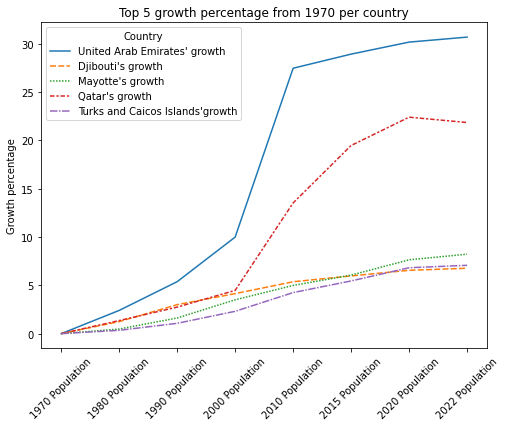

In [77]:
plt.figure(figsize=(8, 6))
sns.lineplot(data=top5)
plt.xticks(rotation=45);
plt.ylabel('Growth percentage');
plt.title('Top 5 growth percentage from 1970 per country');

we can see that **UAE** and **Qatar** have the highest percentages in population growth 

### Research Question 2  (which content has the largest growing population?)

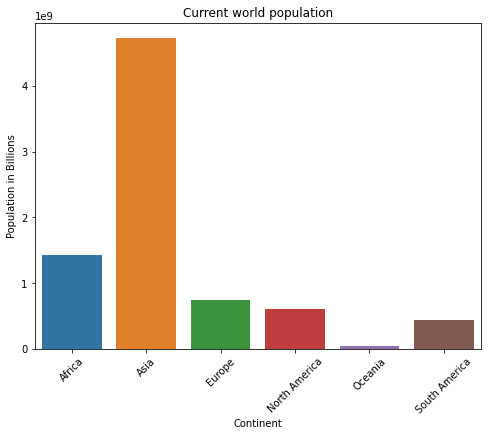

In [83]:
continents=world_data.groupby("Continent")[years].sum()
plt.figure(figsize=(8, 6));
sns.barplot(data=continents,x=continents.index,y=continents['2022 Population']);
plt.xticks(rotation=45);
plt.ylabel('Population in Billions');
plt.title('Current world population');


So Asia is leading in the population race but what about the growth in the past decades

In [84]:
continents =continents.T
#calculating growth rate for each continent 
base_valueAf=continents['Africa'].min()
base_valueAs=continents['Asia'].min()
base_valueE=continents['Europe'].min()
base_valueNa=continents['North America'].min()
base_valueSa=continents['South America'].min()
base_valueO=continents['Oceania'].min()

continents["Africa's growth"]=0
continents["Asia's growth"]=0
continents["Europe's growth"]=0
continents["North America's growth"]=0
continents["South America's growth"]=0
continents["Oceania's growth"]=0


for i,v in enumerate(continents['Africa']):
    continents["Africa's growth"][[i]]= (v-base_valueAf)/base_valueAf
for i,v in enumerate(continents['Asia']):
    continents["Asia's growth"][[i]]= (v-base_valueAs)/base_valueAs
for i,v in enumerate(continents['Europe']):
    continents["Europe's growth"][[i]]= (v-base_valueE)/base_valueE
for i,v in enumerate(continents['North America']):
    continents["North America's growth"][[i]]= (v-base_valueNa)/base_valueNa
for i,v in enumerate(continents['South America']):
    continents["South America's growth"][[i]]= (v-base_valueSa)/base_valueSa
for i,v in enumerate(continents['Oceania']):
    continents["Oceania's growth"][[i]]= (v-base_valueO)/base_valueO
continents.drop(["Africa","Asia","Europe","North America","South America","Oceania"],axis=1,inplace=True)
continents

C:\Users\fahda\AppData\Local\Temp\ipykernel_13192\982271450.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  continents["Asia's growth"][[i]]= (v-base_valueAs)/base_valueAs
C:\Users\fahda\AppData\Local\Temp\ipykernel_13192\982271450.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  continents["Europe's growth"][[i]]= (v-base_valueE)/base_valueE
C:\Users\fahda\AppData\Local\Temp\ipykernel_13192\982271450.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retur

Continent,Africa's growth,Asia's growth,Europe's growth,North America's growth,South America's growth,Oceania's growth
1970 Population,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1980 Population,0.317674,0.228648,0.055804,0.167574,0.253136,0.176587
1990 Population,0.746232,0.496832,0.098177,0.335511,0.540040,0.372867
2000 Population,1.240960,0.741377,0.106978,0.540952,0.812073,0.602790
2010 Population,1.887521,0.967471,0.121493,0.720549,1.037233,0.904633
2015 Population,2.286690,1.078529,0.130521,0.808248,1.141179,1.074062
2020 Population,2.723335,1.174028,0.137010,0.883866,1.236519,1.255278
2022 Population,2.904099,1.201207,0.132978,0.903076,1.263918,1.312009


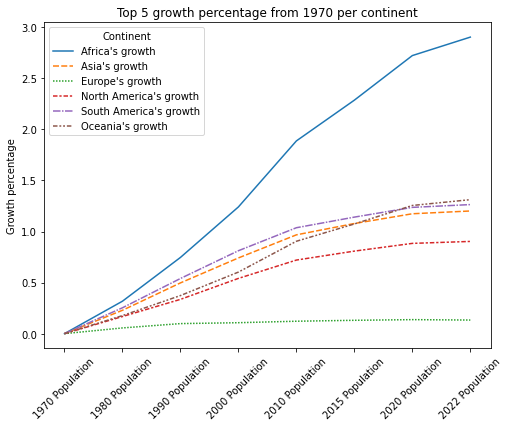

In [85]:
plt.figure(figsize=(8, 6));
sns.lineplot(data=continents)
plt.xticks(rotation=45);
plt.ylabel('Growth percentage');
plt.title('Top 5 growth percentage from 1970 per continent');

The growth rate of Africa is tremendous, it is more that the doub;e of each continent, we can see that Oceania exceeded South america in the past decade While Europe is nearlly zero 

### Research Question 3  (Is there any countries with a decreaase in population?)

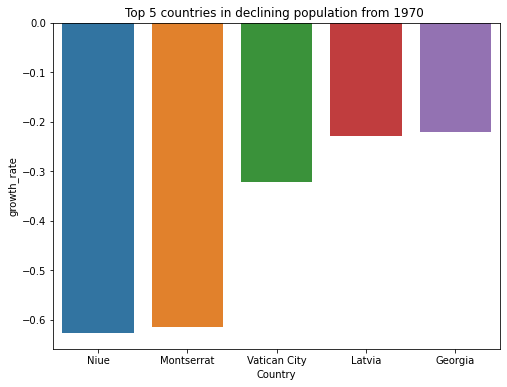

In [98]:
top5decrease = world_data[(world_data['2022 Population'] - world_data['1970 Population'] < 0 )]
top5decrease=top5decrease.sort_values('growth_rate').head()
plt.figure(figsize=(8, 6));
sns.barplot(data = top5decrease,x='Country',y='growth_rate');
plt.title('Top 5 countries in declining population from 1970 ');

we see that there is countries that has had a decrease in their populations from the 1970s 

<a id='conclusions'></a>
## Conclusions

> In this report we found out which contries has the highest growth and which countinents has the highest growth also which countries is decreasing their population states 

> Although that Asia has the highest population and has the highest population growth in countries but Africa has the highest population growth as a continent 

### Limitations
> **Tip**: we need more data on what is the main factors behind a population growth, or what drives people out of a country to figure out what caused these conclusion to occur

